In [4]:
#
# libraries
#
import pandas as pd
from sklearn.linear_model import LinearRegression as OLS
import matplotlib.pyplot as plt
#

In C:\Users\bbate\Miniconda3\envs\keras-gpu-3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In C:\Users\bbate\Miniconda3\envs\keras-gpu-3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\bbate\Miniconda3\envs\keras-gpu-3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In C:\Users\bbate\Miniconda3\envs\keras-gpu-3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\bbate\Miniconda3\envs\keras-gpu-3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 

In [5]:
#
# load data
# 
my_data = pd.read_csv('Datasets\\traffic_date.csv')
my_data.head()
#

,date_time,traffic_volume
0,10/2/2012 9:00,5545
1,10/2/2012 10:00,4516
2,10/2/2012 11:00,4767
3,10/2/2012 12:00,5026
4,10/2/2012 13:00,4918


In [107]:
#
# convert the date_time column to a Pandas datetime
#
my_data.date_time = pd.to_datetime(my_data.date_time)
#

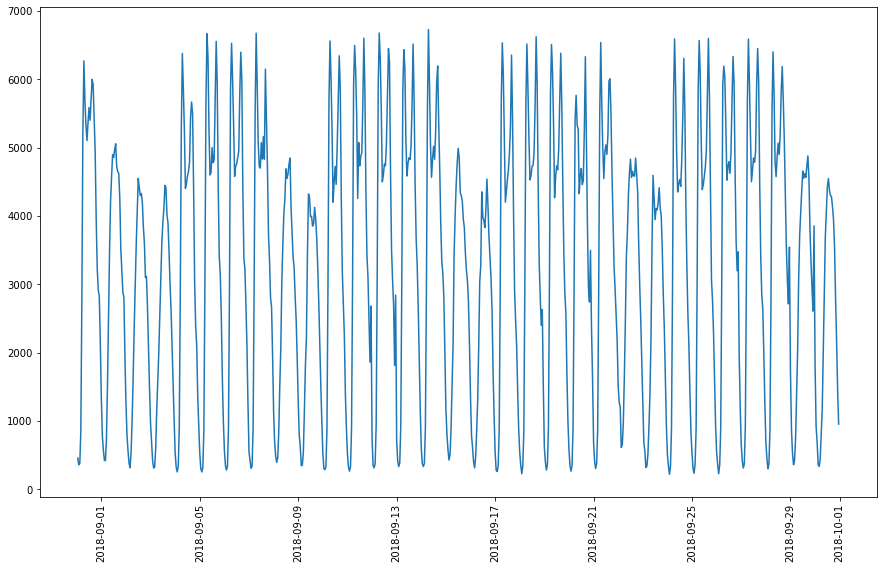

In [113]:
#
# take the most recent month as our data
#
traffic_subset = my_data.loc[my_data.date_time > '2018-08-31', :]
traffic_subset.reset_index(drop = True, inplace = True)
fig, ax = plt.subplots(figsize = (15, 9))
ax.plot(traffic_subset.date_time, traffic_subset.traffic_volume)
plt.xticks(rotation = 90)
plt.show()
#

In [90]:
#
# construct a linear model of the volume vs. time
#
lin_model = OLS()
model_X = np.reshape(np.array((traffic_subset.date_time - 
                               traffic_subset.date_time[0]).astype(np.int64)), (-1, 1))
model_y = np.array(traffic_subset['traffic_volume']).reshape(-1, 1)
my_model = lin_model.fit(model_X, model_y)
print(my_model.intercept_)
print(my_model.coef_)
#

[3079.01901131]
[[1.78032483e-13]]


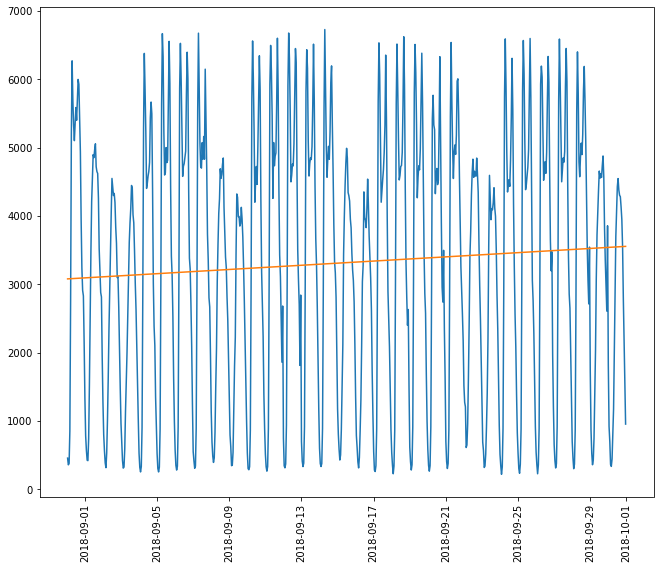

In [114]:
#
fig, ax = plt.subplots(figsize = (11, 9))
ax.plot(traffic_subset.date_time, traffic_subset.traffic_volume)
ax.plot(traffic_subset.date_time, my_model.predict(model_X))
plt.xticks(rotation = 90)
plt.show()
#

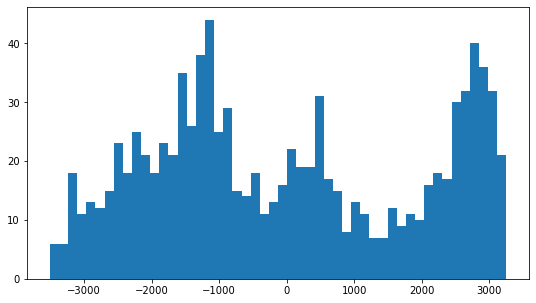

In [106]:
#
residuals = my_model.predict(model_X)[:, 0] - traffic_subset.traffic_volume
fig, ax = plt.subplots(figsize = (9, 5))
ax.hist(residuals, bins = 50)
plt.show()
#